# Data Preparation Using Pandas
- Remember to open this notebook in edit mode.

### Import necessary python modules

In [75]:
import pandas as pd
import numpy as np

### How to load data from a csv file
<font color=red>(You can skip this step, since we are providing the code snippet in the next cells)</font>
- Click on the red `0100` icon in the right top of the toolbar as shown in the picture below. Then select file tab. It would show several files already added as asset to the project. If you want to add a new file, just use the `browse` option in the file tab. Click on `Insert to Code` below one of the files and select `Insert pandas DataFrame`. This will insert a code snippet in currently selected cell. The code snippet loads the csv data into a pandas dataframe.

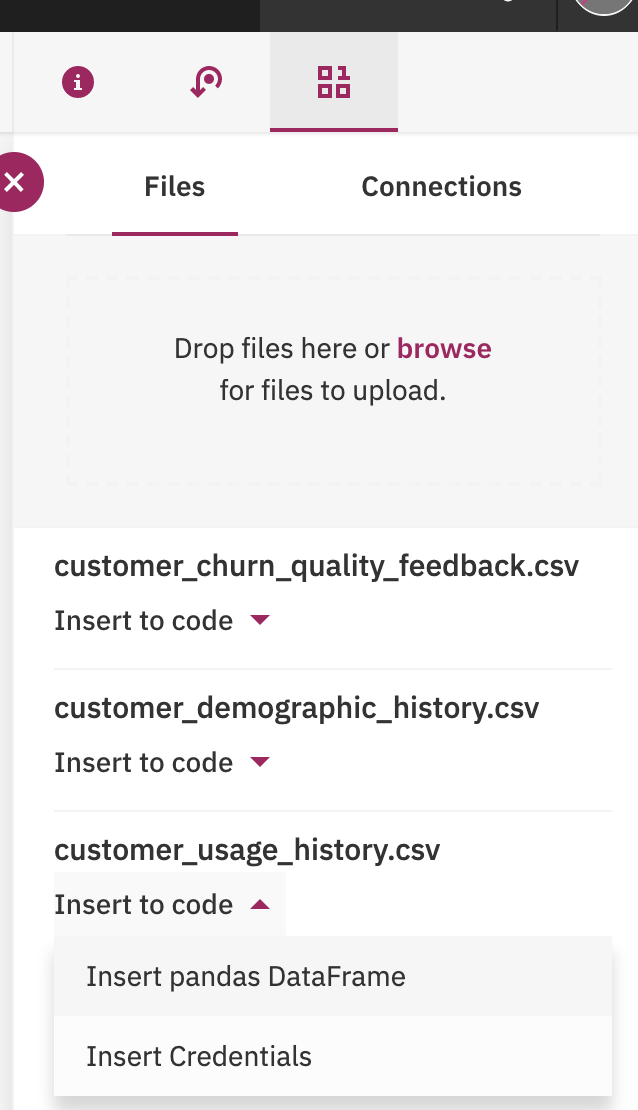

In [76]:
customer_usage_history = pd.read_csv('/project_data/data_asset/customer_usage_history.csv')
customer_usage_history.head()

ID  LONGDISTANCE  INTERNATIONAL  LOCAL  DROPPED PAYMETHOD LOCALBILLTYPE  \
0   1            23              0    206        0        CC        Budget   
1   6            29              0     45        0        CH     FreeLocal   
2   8            24              0     22        0        CC     FreeLocal   
3  11            26              0     32        1        CC        Budget   
4  17            12              0     46        4        CC     FreeLocal   

  LONGDISTANCEBILLTYPE  USAGE  RATEPLAN CHURN  
0       Intnl_discount    229         3     T  
1             Standard     75         2     F  
2             Standard     47         3     F  
3             Standard     59         1     F  
4             Standard     58         1     F

#### You can also alternatively read data from and Database using JDBC. The Database connection has to be already configured in Cloud Pak for Data. 
You can do that by going through the Left Navigation Menu -> Connection. 
Once the connection is defined, you can define a Database table there as Dataset as this project level.
Once the Table is defines as a Dataset you can access the same in the Notebook by going through the Remote tab under `0100` icon in right top navigation of the Notebook.
Clicking the Dataset there you can create a Spark Datafrane that can directly read data from the remove Datbase table.
The sample code (commented) for the same (as it would be created if you perform above steps) are given in the next cell.

In [77]:


# import dsx_core_utils, requests, os, io
# from pyspark.sql import SparkSession
# # Add asset from remote connection
# df1 = None
# dataSet = dsx_core_utils.get_remote_data_set_info('CUST_DAILY_TEST00')
# dataSource = dsx_core_utils.get_data_source_info(dataSet['datasource'])
# sparkSession = SparkSession(sc).builder.getOrCreate()
# # Load JDBC data to Spark dataframe
# dbTableOrQuery = '"' + (dataSet['schema'] + '"."' if(len(dataSet['schema'].strip()) != 0) else '') + dataSet['table'] + '"'
# if (dataSet['query']):
#     dbTableOrQuery = "(" + dataSet['query'] + ") TBL"
# df1 = sparkSession.read.format("jdbc").option("url", dataSource['URL']).option("dbtable", dbTableOrQuery).option("user",dataSource['user']).option("password",dataSource['password']).load()
# df1.show(5)




#### Loading second csv file as pandas dataframe
- The following code snippet loads `customer_demograhic_history.csv` into a pandas dataframe.

In [78]:
customer_demographic_history = pd.read_csv('/project_data/data_asset/customer_demographic_history.csv')
customer_demographic_history.head()

ID GENDER STATUS  CHILDREN  ESTINCOME CAROWNER        AGE
0   1      F      S         1   38000.00        N  24.393333
1   6      M      M         2   29616.00        N  49.426667
2   8      M      M         0   19732.80        N  50.673333
3  11      M      S         2      96.33        N  56.473333
4  17      M      M         2   53010.80        N  18.840000

#### Now we need to join these two dataframe using column `ID`. The resultant dataframe will be used for building the model.

In [79]:
enhanced_customer_history = pd.merge(customer_usage_history, customer_demographic_history, on='ID')
enhanced_customer_history.head()

ID  LONGDISTANCE  INTERNATIONAL  LOCAL  DROPPED PAYMETHOD LOCALBILLTYPE  \
0   1            23              0    206        0        CC        Budget   
1   6            29              0     45        0        CH     FreeLocal   
2   8            24              0     22        0        CC     FreeLocal   
3  11            26              0     32        1        CC        Budget   
4  17            12              0     46        4        CC     FreeLocal   

  LONGDISTANCEBILLTYPE  USAGE  RATEPLAN CHURN GENDER STATUS  CHILDREN  \
0       Intnl_discount    229         3     T      F      S         1   
1             Standard     75         2     F      M      M         2   
2             Standard     47         3     F      M      M         0   
3             Standard     59         1     F      M      S         2   
4             Standard     58         1     F      M      M         2   

   ESTINCOME CAROWNER        AGE  
0   38000.00        N  24.393333  
1   29616.00        N  49.426667  
2   19732.80        N  50.673333  
3      96.33        N  56.473333  
4   53010.80        N  18.840000

### Lets add a new column `Phase`
- Phase is based on `AGE`.  

In [82]:
enhanced_customer_history['Phase']=enhanced_customer_history['AGE'].apply(lambda age: "Adult" if age> 18 else "Child" );

#### Let's check the summary statistics.

In [83]:
enhanced_customer_history.describe()

ID  LONGDISTANCE  INTERNATIONAL        LOCAL      DROPPED  \
count  1415.000000   1415.000000    1415.000000  1415.000000  1415.000000   
mean   1898.923675     15.768905       1.026148    58.600707     0.128622   
std    1088.964998      9.826984       2.407266    57.018133     0.525577   
min       1.000000      0.000000       0.000000     0.000000     0.000000   
25%     976.500000      8.000000       0.000000    15.000000     0.000000   
50%    1882.000000     16.000000       0.000000    40.000000     0.000000   
75%    2835.500000     22.500000       0.000000    87.000000     0.000000   
max    3824.000000     59.000000       9.000000   332.000000     4.000000   

             USAGE     RATEPLAN     CHILDREN      ESTINCOME          AGE  
count  1415.000000  1415.000000  1415.000000    1415.000000  1415.000000  
mean     75.349823     2.512367     1.151943   51151.138883    42.833112  
std      59.178654     1.121203     0.844456   30669.669978    14.907899  
min       0.000000     1.000000     0.000000      96.330000    12.326667  
25%      34.000000     2.000000     0.000000   21274.000000    30.886667  
50%      57.000000     2.000000     1.000000   55221.000000    45.526667  
75%     107.000000     4.000000     2.000000   77726.400000    54.000000  
max     361.000000     4.000000     2.000000  120000.000000    77.000000

#### We will be using `CHURN` column as  training label. So let's see the distribution.

In [85]:
enhanced_customer_history.groupby('CHURN').count()['ID']

CHURN
F    838
T    577
Name: ID, dtype: int64

#### Now let's save the enhanced datafrme as a CSV file in the project asset. 
- We will read this file back in next notebook to build the model.

In [86]:
from IPython.display import HTML
from project_lib import Project

project = Project.access()
project.save_data("enhanced_customer_history_pandas.csv", enhanced_customer_history.to_csv(index=False), set_project_asset=True, overwrite=True)


{'file_name': 'enhanced_customer_history_pandas.csv',
 'message': 'File saved to project storage.',
 'asset_id': '74188529-1600-4d50-801f-3b062f9cfb0b'}

#### Verify that `enhanced_customer_history_pandas.csv` file is added to the asset.
- Execute the following cell. It would generate a link for the project homepage.
- Visit project home page by following the link.
- Verify that `enhanced_customer_history_pandas.csv` is in the asset section.

In [87]:
project_meta = project.get_metadata()
project_url= "/projects/"+project_meta['metadata']['guid']
wos_html_str = """<font size=4><a href=""" + project_url + """ target="_blank">""" + 'Project home' + """</a></font>"""
display(HTML(wos_html_str))